In [2]:
import os
import glob
import pandas as pd
import pylab as pl
import seaborn as sns

import scipy as sp
import numpy as np

In [3]:
%matplotlib notebook

In [4]:
traj_dir = '/Users/julianarhee/Repositories/pfly/trajectories'
stimulus_name = 'circle' # 'simpleround2_1K'
stimulus_name = 'circle_diffspeeds2'

traj_path = os.path.join(traj_dir, '{}.csv'.format(stimulus_name))
stim0 = pd.read_csv(traj_path)
stim0.shape

(40000, 3)

In [5]:
stim0

,x_0,y_0,o_0
0,10.100000,1.000000e-01,-1.570796
1,10.000000,0.000000e+00,-1.570796
2,10.000000,0.000000e+00,-1.570796
3,10.000000,0.000000e+00,-1.570796
4,10.000000,0.000000e+00,-1.570796
...,...,...,...
39995,9.679487,-2.511480e+00,-1.824662
39996,9.819287,-1.892512e+00,-1.761196
39997,9.919548,-1.265925e+00,-1.697729
39998,9.979867,-6.342392e-01,-1.634263


In [165]:
prj_interval = 10
#np.arange(0, len(stim0))*prj_interval / 1000
stim0['t'] = np.arange(0, len(stim0))*prj_interval / 1000

In [166]:
stim0['dist'] = np.linalg.norm(stim0[['x_0', 'y_0']].diff(axis=0), axis=1)
# stim0['dist'] = np.linalg.norm(stim0[['x_0', 'y_0']].diff(axis=0).drop(0), axis=1)

In [167]:
stim0['vel'] = round(stim0['dist']/stim0['t'].diff(), 2)

<IPython.core.display.Javascript object>


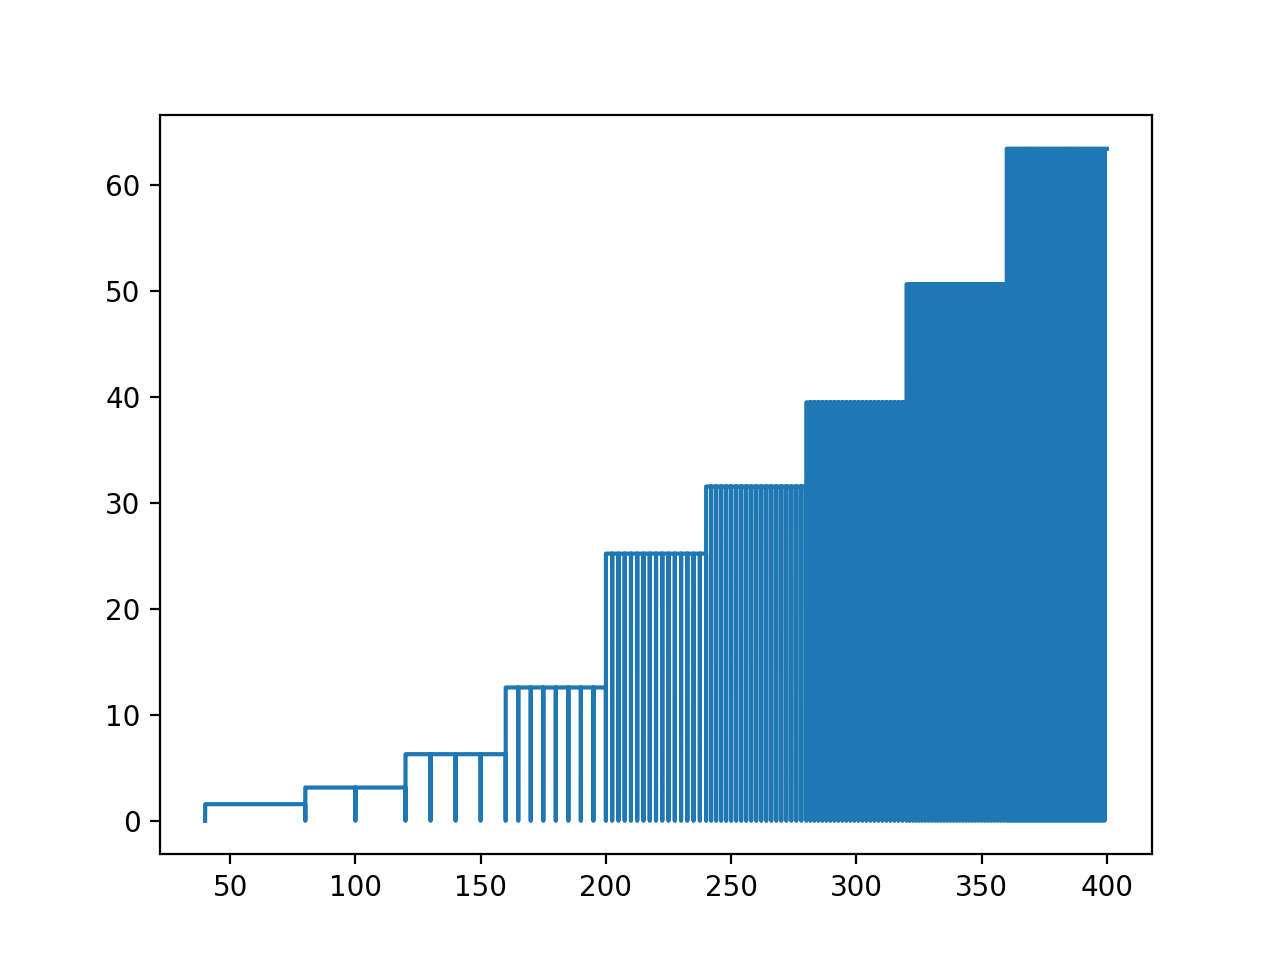

In [168]:
pl.figure()
pl.plot(stim0['t'].loc[4000:], stim0['vel'].loc[4000:])

In [169]:
t = stim0.loc[4001:].copy()
t.groupby('vel').groups.keys()

dict_keys([0.0, 1.57, 3.14, 6.29, 12.59, 25.23, 31.57, 39.51, 50.67, 63.46])

In [175]:
for vi, (v, df_) in enumerate(stim0.loc[4001:].groupby('vel')):
    n_rot = len(df_[(df_['x_0'].round(3)==10) & (df_['y_0'].round(3)==0)])
    #n_rot = len(df_[df_['vel']==0])
    dur = df_['t'].max() - df_['t'].min()
    print(vi, v, n_rot, round(dur, 2), round(n_rot/dur, 2))

0 0.0 147 319.0 0.46
1 1.57 1 39.98 0.03
2 3.14 2 39.98 0.05
3 6.29 4 39.98 0.1
4 12.59 8 39.98 0.2
5 25.23 16 39.98 0.4
6 31.57 20 39.98 0.5
7 39.51 25 39.98 0.63
8 50.67 32 39.98 0.8
9 63.46 40 39.98 1.0


<IPython.core.display.Javascript object>


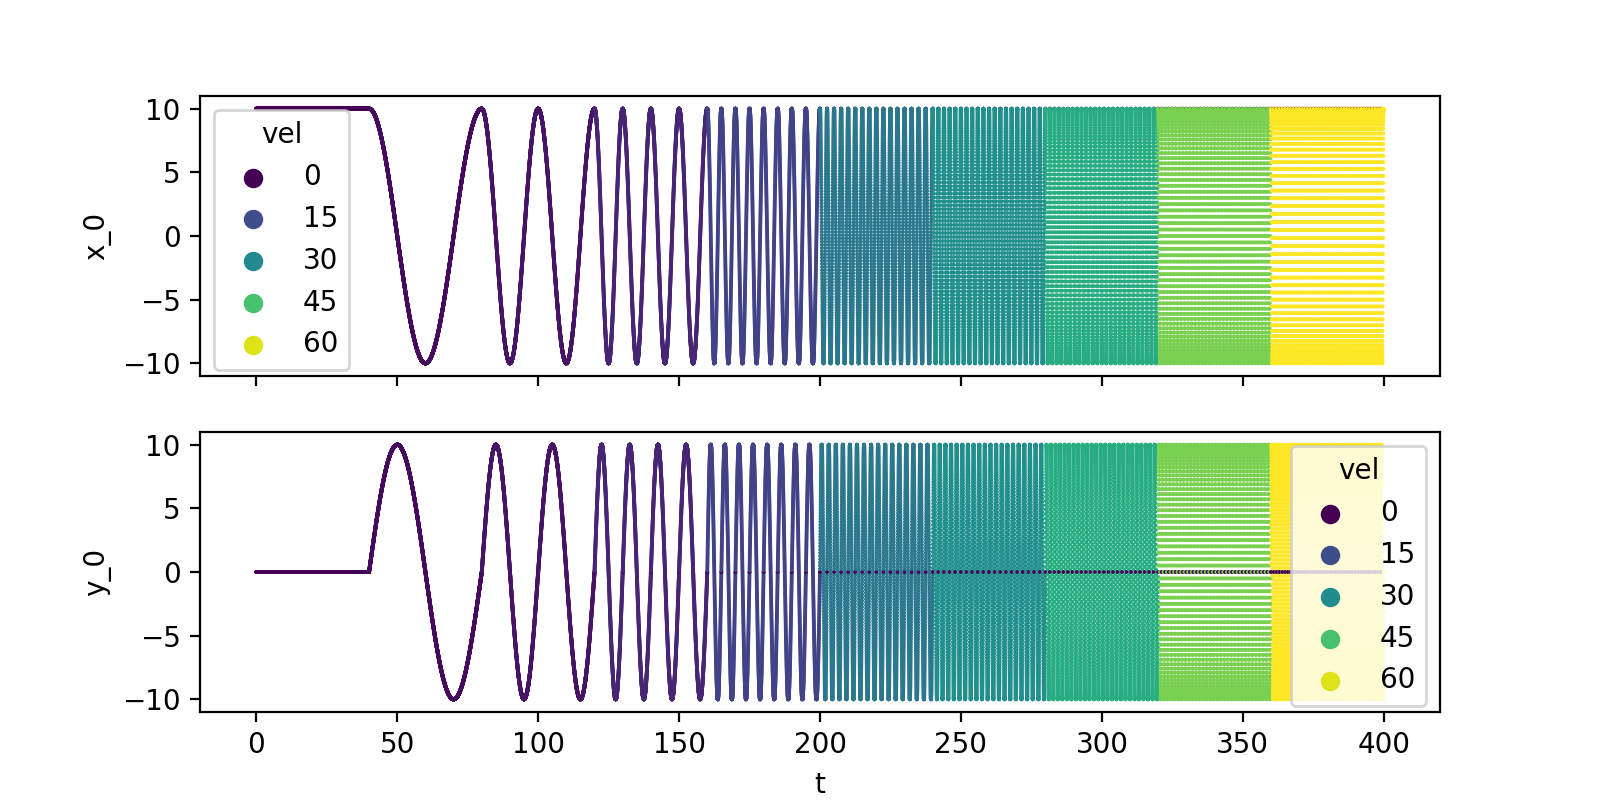

<Axes: xlabel='t', ylabel='y_0'>

In [171]:
fig, axn = pl.subplots(2, 1, figsize=(8,4), sharex=True, sharey=True)
sns.scatterplot(data=stim0, x='t', y='x_0', hue='vel', palette='viridis', ax=axn[0],
                edgecolor='none', s=2)
sns.scatterplot(data=stim0, x='t', y='y_0', hue='vel', palette='viridis', ax=axn[1],
                edgecolor='none', s=2)

In [160]:
stim0

,x_0,y_0,o_0,t,dist,vel
0,10.100000,1.000000e-01,-1.570796,0.000,NaN,NaN
1,10.000000,0.000000e+00,-1.570796,0.005,0.141421,28.28
2,10.000000,0.000000e+00,-1.570796,0.010,0.000000,0.00
3,10.000000,0.000000e+00,-1.570796,0.015,0.000000,0.00
4,10.000000,0.000000e+00,-1.570796,0.020,0.000000,0.00
...,...,...,...,...,...,...
39995,9.679487,-2.511480e+00,-1.824662,199.975,0.634559,126.91
39996,9.819287,-1.892512e+00,-1.761196,199.980,0.634559,126.91
39997,9.919548,-1.265925e+00,-1.697729,199.985,0.634559,126.91
39998,9.979867,-6.342392e-01,-1.634263,199.990,0.634559,126.91


In [161]:
stim0.loc[0:4001]

,x_0,y_0,o_0,t,dist,vel
0,10.100000,0.100000,-1.570796,0.000,NaN,NaN
1,10.000000,0.000000,-1.570796,0.005,0.141421,28.28
2,10.000000,0.000000,-1.570796,0.010,0.000000,0.00
3,10.000000,0.000000,-1.570796,0.015,0.000000,0.00
4,10.000000,0.000000,-1.570796,0.020,0.000000,0.00
...,...,...,...,...,...,...
3997,10.000000,0.000000,-1.570796,19.985,0.000000,0.00
3998,10.000000,0.000000,-1.570796,19.990,0.000000,0.00
3999,10.000000,0.000000,-1.570796,19.995,0.000000,0.00
4000,10.000000,0.000000,-1.570796,20.000,0.000000,0.00


In [162]:
stim0.shape

(40000, 6)

In [230]:
x0, y0 = stim0.iloc[0][['x_0', 'y_0']]
print(x0, y0)
stim0[(stim0['x_0']==x0) & (stim0['y_0']==y0)]

10.1 0.1


,x_0,y_0,o_0
0,10.1,0.1,-1.570796


In [222]:
if stimulus_name == 'simpleround2_1K':
    stim = stim0.iloc[0:176]
else:
    stim= stim0.copy()

<IPython.core.display.Javascript object>


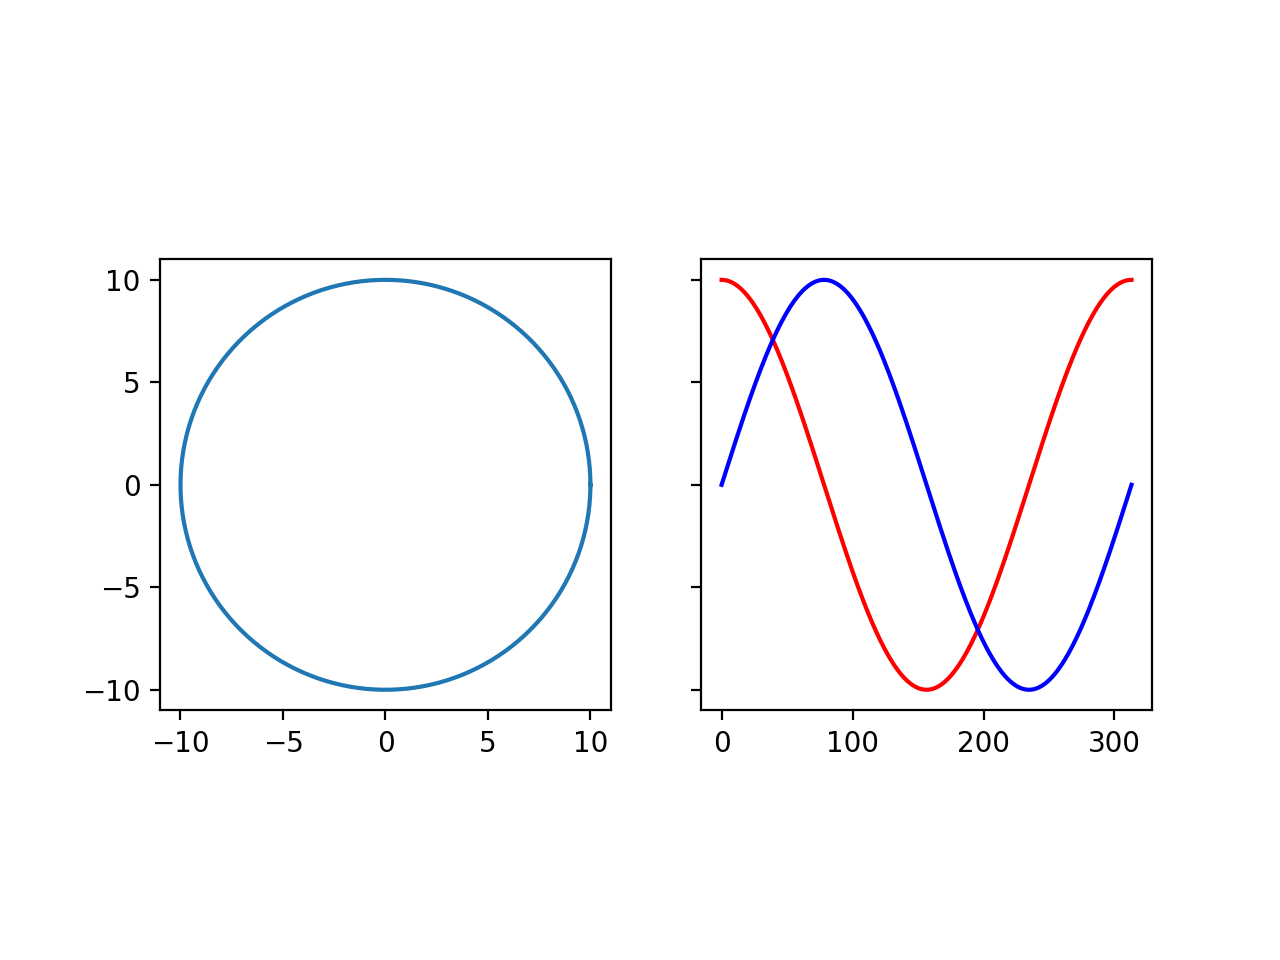

In [224]:
fig, axn = pl.subplots(1,2, sharey=True)
axn[0].plot(stim['x_0'], stim['y_0'])
ax.set_aspect(1)
axn[1].plot(stim['x_0'].values, 'r')
axn[1].plot(stim['y_0'].values, 'b')
for ax in axn:
    ax.set_box_aspect(1)

In [171]:
# F frames * (prj_interval/1000)  = N sec for 1 loop
# 5-20ms as prj_interval is pretty good
# don't have less than 100 frames for 1 rotation
# if flies have 120Hz rate, then u want prj_inteval of 0.008
# 3 second / 0.008 prj_interval = N frames (375)

# simpleround2
# 176 frames * 0.015 prj_interval = 2.64 seconds per iteration

In [172]:
# one loop is 375 frames (3seconds, at 8 prj_interval), then for 60s baseline:
# FP.t = 60*375

In [173]:
# 10*60 = 600 sec (desired duration of experiment)
# 3sec for 1 rotation: 
# 200 rotations * 375 frames = 75k frames

In [182]:
(200*300/10.)/60.
600 sec /

0.01

In [225]:
n_orig = stim.shape[0]
print("N frames, orig: {}".format(n_orig))
prj_interval_ms = 10
n_sec_per_rotation = 3
n_target = int( n_sec_per_rotation / (prj_interval_ms/1000) )
print("N target frames: {}".format(n_target))
#n_target = 300 #375
#exp_dur_min = 10
duration_sec = 30
# n_reps = int( (exp_dur_min * 60) / n_sec_per_rotation )

print("N reps of stimulus: {}".format(n_reps))

N frames, orig: 314
N target frames: 300
N reps of stimulus: 200


In [226]:
# upsample
d_list = []
for c in stim.columns:
    x_sp = sp.signal.resample(stim[c].values, n_target)
    d_ = pd.DataFrame(data=x_sp, columns=[c])
    d_list.append(d_)
newstim = pd.concat(d_list, axis=1)
#y_sp = sp.signal.resample(stim['y_0'], n_target)

In [227]:
newstim

,x_0,y_0,o_0
0,10.000000,0.004156,1.701278
1,9.997800,0.208735,1.549162
2,9.991166,0.420754,1.633553
3,9.980146,0.629546,1.622432
4,9.964700,0.839647,1.661166
...,...,...,...
295,9.963909,-0.848040,7.792243
296,9.979553,-0.640098,7.763612
297,9.990765,-0.428451,7.842494
298,9.997605,-0.220759,7.791225


In [206]:
full_exp = pd.concat([newstim] * n_reps)
full_exp

,x_0,y_0,o_0
0,10.000000,0.004156,1.701278
1,9.997800,0.208735,1.549162
2,9.991166,0.420754,1.633553
3,9.980146,0.629546,1.622432
4,9.964700,0.839647,1.661166
...,...,...,...
295,9.963909,-0.848040,7.792243
296,9.979553,-0.640098,7.763612
297,9.990765,-0.428451,7.842494
298,9.997605,-0.220759,7.791225


In [176]:
full_exp = pd.concat([newstim] * n_reps)

In [177]:
if stimulus_name == 'simpleround2_1K':
    stimulus_name = 'simpleround2_75k'
    
new_stimulus_name = '{}_300'.format(stimulus_name)
print(new_stimulus_name)
out_fpath = os.path.join(traj_dir, '{}.csv'.format(new_stimulus_name))
full_exp.to_csv(out_fpath, index=False)
print(out_fpath)

circle_300
/Users/julianarhee/Repositories/pfly/trajectories/circle_300.csv


In [209]:
(60000 * n_sec_per_rotation) * (1/n_target)

600.0

In [143]:
300/

3000.0

In [144]:
375*30

11250